In [92]:
# import pandas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [93]:
# read the data
df = pd.read_csv("Bengaluru_House_Data.csv")

EDA

In [94]:
#checking 1st 5 rows of the dataset
df.head()

,area_type,size,bathroom,parking,balcony,price,total_sqft,hospital_nearby,school_nearby,mall_nearby,resale,security24x7,clubhouse
0,Super built-up Area,2 BHK,2.0,2,1.0,3907000,1056.0,No,No,Yes,0,1,1
1,Plot Area,4 BHK,5.0,1,3.0,12000000,2600.0,No,Yes,Yes,1,1,1
2,Built-up Area,3 BHK,2.0,1,3.0,6200000,1440.0,No,Yes,Yes,1,1,0
3,Super built-up Area,3 BHK,3.0,2,1.0,9500000,1521.0,Yes,Yes,No,0,1,1
4,Super built-up Area,2 BHK,2.0,1,1.0,5100000,1200.0,No,No,Yes,1,0,0


In [95]:
#checking last 5 rows of dataset
df.tail()

,area_type,size,bathroom,parking,balcony,price,total_sqft,hospital_nearby,school_nearby,mall_nearby,resale,security24x7,clubhouse
13301,Built-up Area,5 BHK,4.0,1,0.0,23100000,3453.0,Yes,No,Yes,0,0,1
13302,Super built-up Area,4 BHK,5.0,1,NaN,40000000,3600.0,Yes,No,Yes,1,0,0
13303,Built-up Area,2 BHK,2.0,2,1.0,6000000,1141.0,No,No,Yes,1,0,0
13304,Super built-up Area,4 BHK,4.0,1,1.0,48800000,4689.0,No,Yes,No,1,1,0
13305,Super built-up Area,1 BHK,1.0,1,1.0,1700000,550.0,No,Yes,Yes,1,0,1


In [96]:
#checking shape of dataset
df.shape

(13306, 13)

here are total of 13306 rows and 13 columns in dataset

In [97]:
#checking information of dataset
#tells us about how many rows are present which value and how many are null
# also tells about the datatypes of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13306 entries, 0 to 13305
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   area_type        13306 non-null  object 
 1   size             13306 non-null  object 
 2   bathroom         13244 non-null  float64
 3   parking          13306 non-null  int64  
 4   balcony          12715 non-null  float64
 5   price            13306 non-null  int64  
 6   total_sqft       13306 non-null  float64
 7   hospital_nearby  13306 non-null  object 
 8   school_nearby    13306 non-null  object 
 9   mall_nearby      13306 non-null  object 
 10  resale           13306 non-null  int64  
 11  security24x7     13306 non-null  int64  
 12  clubhouse        13306 non-null  int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.3+ MB


In [98]:
#describing the data 
# can check total rows,standard deviation,quartiles,min and max 
df.describe()

,bathroom,parking,balcony,price,total_sqft,resale,security24x7,clubhouse
count,13244.000000,13306.000000,12715.000000,1.330600e+04,13306.000000,13306.000000,13306.000000,13306.000000
mean,2.661054,1.492635,1.583956,1.113459e+07,1527.415335,0.500225,0.500376,0.496017
std,1.216547,0.505942,0.818571,1.420972e+07,839.821773,0.500019,0.500019,0.500003
min,1.000000,0.000000,0.000000,9.000000e+05,400.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,5.000000e+06,1100.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,2.000000,7.200000e+06,1275.000000,1.000000,1.000000,0.000000
75%,3.000000,2.000000,2.000000,1.200000e+07,1680.000000,1.000000,1.000000,1.000000
max,27.000000,2.000000,4.000000,3.600000e+08,9600.000000,1.000000,1.000000,1.000000


In [99]:
# get the summary output for categorical variable
df.describe(include = "object")

,area_type,size,hospital_nearby,school_nearby,mall_nearby
count,13306,13306,13306,13306,13306
unique,4,12,2,2,2
top,Super built-up Area,2 BHK,Yes,Yes,No
freq,8790,5525,6739,6660,6709


In [100]:
#all the columns present in data
df.columns

Index(['area_type', 'size', 'bathroom', 'parking', 'balcony', 'price',
       'total_sqft', 'hospital_nearby', 'school_nearby', 'mall_nearby',
       'resale', 'security24x7', 'clubhouse'],
      dtype='object')

In [101]:
#data types of the dataset
df.dtypes

area_type           object
size                object
bathroom           float64
parking              int64
balcony            float64
price                int64
total_sqft         float64
hospital_nearby     object
school_nearby       object
mall_nearby         object
resale               int64
security24x7         int64
clubhouse            int64
dtype: object

In [102]:
#checking null values
df.isna().sum()

area_type            0
size                 0
bathroom            62
parking              0
balcony            591
price                0
total_sqft           0
hospital_nearby      0
school_nearby        0
mall_nearby          0
resale               0
security24x7         0
clubhouse            0
dtype: int64

There are 591 missing values in balcony, 62 in bath and 1 in location

Plotting a heatmap of the missing values

Handling Null Values

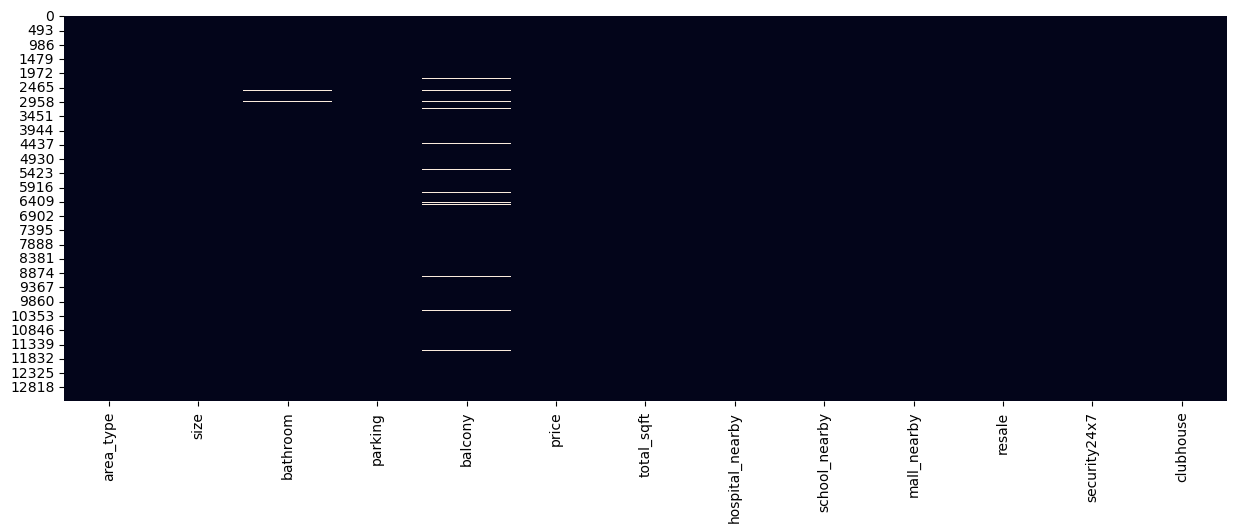

In [104]:
# let us plot a heatmap of the missing values

# import the required libraries
# import the library seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set the figure size
plt.rcParams["figure.figsize"]=[15,5]

# plot a heatmap of the missing values in the data
# cbar: specify whether to display the color index or not
sns.heatmap(df.isnull(), cbar = False)

# display the plot
plt.show()

In [105]:
# get the count of missing values
missing_values = df.isnull().sum()

# check for missing values
total = df.isnull().sum().sort_values(ascending=False)

# calculate percentage of the missing values
percent = ((df.isnull().sum()/df.shape[0])*100)

# sort the values in descending order
# ascending: 
percent = percent.sort_values(ascending=False)

# concatenate the total missing values and percentage of the missing values
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# add the data types
missing_data['Type'] = df[missing_data.index].dtypes

# view the missing data
missing_data

,Total,Percent,Type
balcony,591,4.441605,float64
bathroom,62,0.465955,float64
area_type,0,0.000000,object
size,0,0.000000,object
parking,0,0.000000,int64
price,0,0.000000,int64
total_sqft,0,0.000000,float64
hospital_nearby,0,0.000000,object
school_nearby,0,0.000000,object
mall_nearby,0,0.000000,object


In [106]:
from sklearn.impute import KNNImputer

In [107]:
imputer = KNNImputer(n_neighbors=3)

In [108]:
df[['balcony']] = imputer.fit_transform(df[['balcony']])
df[['bathroom']] = imputer.fit_transform(df[['bathroom']])

In [109]:
df.isnull().sum()

area_type          0
size               0
bathroom           0
parking            0
balcony            0
price              0
total_sqft         0
hospital_nearby    0
school_nearby      0
mall_nearby        0
resale             0
security24x7       0
clubhouse          0
dtype: int64

In [110]:
# drop the rows having missing values
df1 = df.dropna()

# display the dataframe
df1.shape

(13306, 13)

In [111]:
df1.isnull().sum()

area_type          0
size               0
bathroom           0
parking            0
balcony            0
price              0
total_sqft         0
hospital_nearby    0
school_nearby      0
mall_nearby        0
resale             0
security24x7       0
clubhouse          0
dtype: int64

In [112]:
df1

,area_type,size,bathroom,parking,balcony,price,total_sqft,hospital_nearby,school_nearby,mall_nearby,resale,security24x7,clubhouse
0,Super built-up Area,2 BHK,2.0,2,1.000000,3907000,1056.0,No,No,Yes,0,1,1
1,Plot Area,4 BHK,5.0,1,3.000000,12000000,2600.0,No,Yes,Yes,1,1,1
2,Built-up Area,3 BHK,2.0,1,3.000000,6200000,1440.0,No,Yes,Yes,1,1,0
3,Super built-up Area,3 BHK,3.0,2,1.000000,9500000,1521.0,Yes,Yes,No,0,1,1
4,Super built-up Area,2 BHK,2.0,1,1.000000,5100000,1200.0,No,No,Yes,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13301,Built-up Area,5 BHK,4.0,1,0.000000,23100000,3453.0,Yes,No,Yes,0,0,1
13302,Super built-up Area,4 BHK,5.0,1,1.583956,40000000,3600.0,Yes,No,Yes,1,0,0
13303,Built-up Area,2 BHK,2.0,2,1.000000,6000000,1141.0,No,No,Yes,1,0,0
13304,Super built-up Area,4 BHK,4.0,1,1.000000,48800000,4689.0,No,Yes,No,1,1,0


In [113]:
#checking counts of the values
df1.value_counts()

area_type             size   bathroom  parking  balcony  price     total_sqft  hospital_nearby  school_nearby  mall_nearby  resale  security24x7  clubhouse
Super built-up  Area  2 BHK  2.0       2        2.0      5000000   1115.0      Yes              No             Yes          0       0             0            4
                      3 BHK  2.0       1        2.0      4200000   1200.0      No               No             No           1       1             0            2
                      1 BHK  1.0       1        1.0      1500000   500.0       Yes              Yes            Yes          0       1             1            2
Built-up  Area        2 BHK  2.0       2        1.0      4000000   940.0       Yes              Yes            No           1       0             0            2
Super built-up  Area  2 BHK  2.0       1        2.0      4300000   1140.0      Yes              No             No           1       0             1            2
                                       

In [114]:
df1.mean()

C:\Users\satyam\AppData\Local\Temp\ipykernel_1176\2053335143.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean()


bathroom        2.661054e+00
parking         1.492635e+00
balcony         1.583956e+00
price           1.113459e+07
total_sqft      1.527415e+03
resale          5.002255e-01
security24x7    5.003758e-01
clubhouse       4.960168e-01
dtype: float64

In [115]:
#checking median
df1.median()

C:\Users\satyam\AppData\Local\Temp\ipykernel_1176\3334925617.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.median()


bathroom              2.0
parking               1.0
balcony               2.0
price           7200000.0
total_sqft         1275.0
resale                1.0
security24x7          1.0
clubhouse             0.0
dtype: float64

Since there is difference between mean and median we have to remove outliers and outliers can disturb the model .
In regression model like knn it is very sensitive to outliers

In [116]:
# filter the numeric variables from the data
df_num = df.select_dtypes(include = np.number)

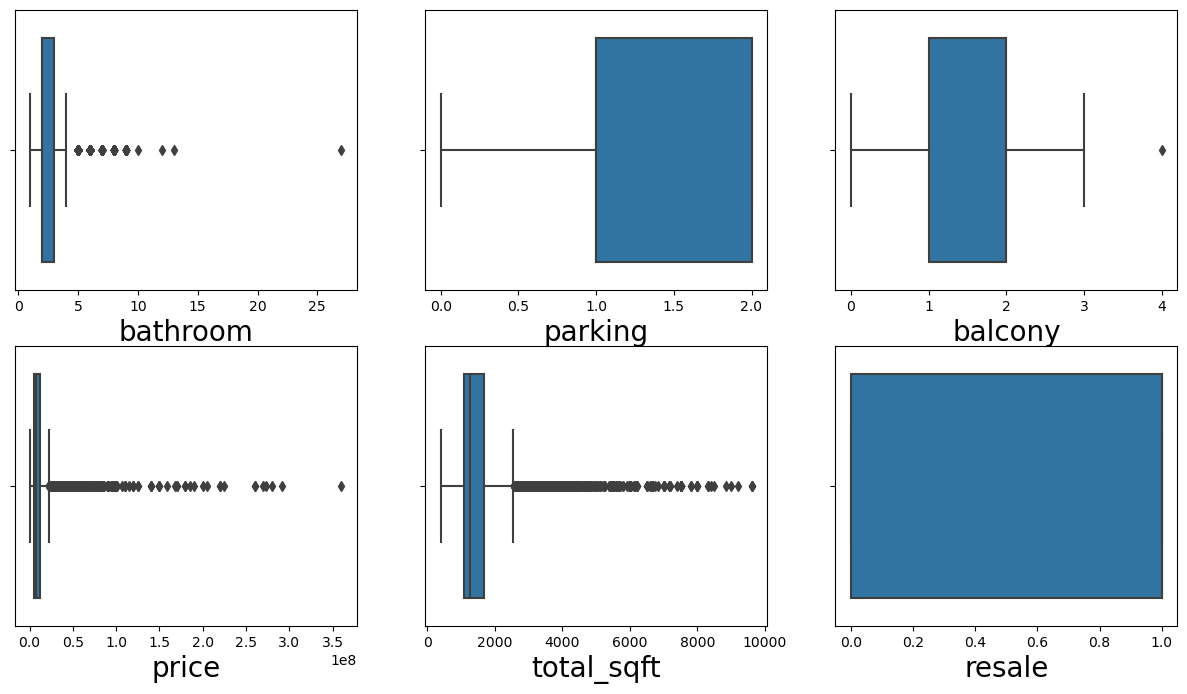

In [117]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

In [118]:
import numpy as np

In [119]:
#removing outliers with IQR 
q1 = np.quantile(df1.price, 0.25) #1st quantile
q2 = np.quantile(df1.price, 0.5) #2nd quantile
q3 = np.quantile(df1.price, 0.75) #3rd quantile
IQR = q3 - q1 #Inter - Quartile Range

In [120]:
#setting the fences on our dataset to identify the outliers
lower = q1 - (1.5*IQR) #lower whisker
upper = q3 + (1.5*IQR) #upper whisker

In [121]:
#removal of lower and upper outliers in our data
df1 = df1[~((df1.price > upper) | (df1.price < lower))]


In [122]:
#removing outliers with IQR 
q1 = np.quantile(df1.total_sqft, 0.25) #1st quantile
q2 = np.quantile(df1.total_sqft, 0.5) #2nd quantile
q3 = np.quantile(df1.total_sqft, 0.75) #3rd quantile
IQR = q3 - q1 #Inter - Quartile Range

In [123]:
#setting the fences on our dataset to identify the outliers
lower = q1 - (1.5*IQR) #lower whisker
upper = q3 + (1.5*IQR) #upper whisker

In [124]:
#removal of lower and upper outliers in our data
df1 = df1[~((df1.total_sqft > upper) | (df1.total_sqft < lower))]


In [125]:
#rechecking the shape
df1.shape

(11359, 13)

In [126]:
#defining the features and label column of our data
X = df1.drop('price',axis = 'columns')
y = df1[['price']]


In [127]:
#dividing data into categorical and numerical
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(exclude = np.number)


In [128]:
#describing numerical features
X_num.describe()

,bathroom,parking,balcony,total_sqft,resale,security24x7,clubhouse
count,11359.000000,11359.000000,11359.000000,11359.000000,11359.000000,11359.000000,11359.000000
mean,2.390598,1.489304,1.549426,1268.725746,0.500836,0.503918,0.495906
std,0.921832,0.506903,0.779836,351.013039,0.500021,0.500007,0.500005
min,1.000000,0.000000,0.000000,400.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1070.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,2.000000,1214.000000,1.000000,1.000000,0.000000
75%,3.000000,2.000000,2.000000,1490.000000,1.000000,1.000000,1.000000
max,9.000000,2.000000,3.000000,2254.000000,1.000000,1.000000,1.000000


In [129]:
# filter the numeric variables from the data
df_num = df1.select_dtypes(include = np.number)

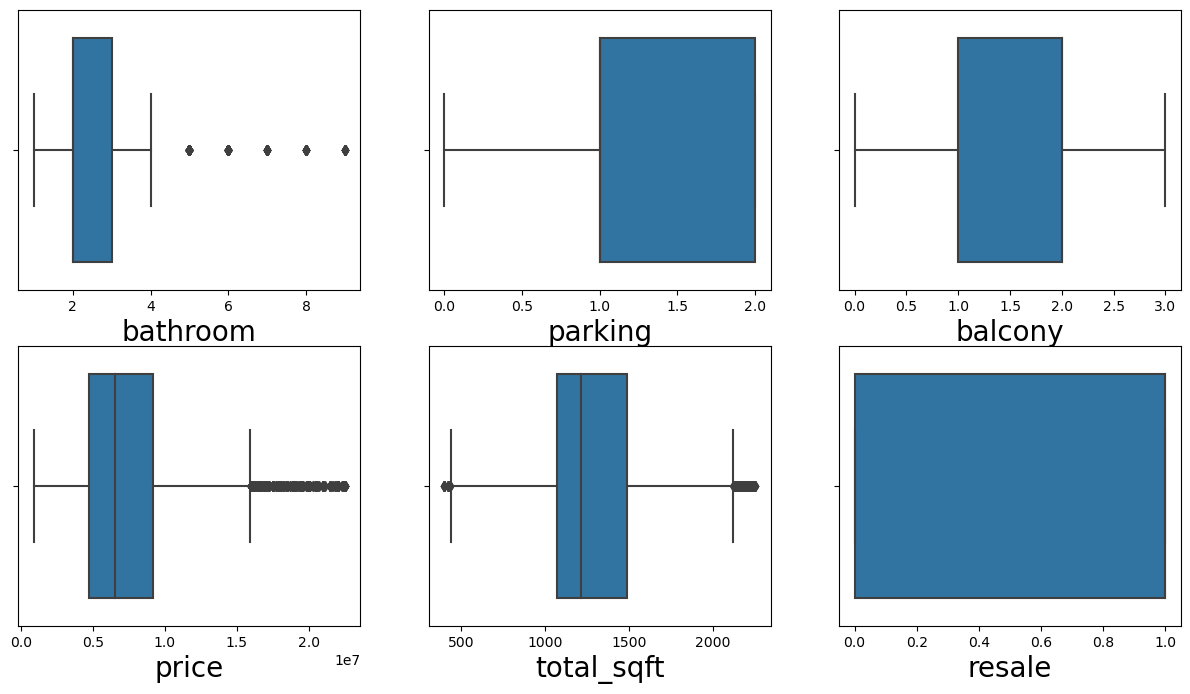

In [130]:
# plot the boxplot for each variable
# subplots(): plot subplots
# figsize(): set the figure size
fig, ax = plt.subplots(2, 3, figsize=(15, 8))

# plot the boxplot using boxplot() from seaborn
# z: let the variable z define the boxplot
# x: data for which the boxplot is to be plotted
# orient: "h" specifies horizontal boxplot (for vertical boxplots use "v")
# whis: proportion of the IQR past the low and high quartiles to extend the plot whiskers
# ax: specifies the axes object to draw the plot onto
# set_xlabel(): set the x-axis label
# fontsize: sets the font size of the x-axis label
for variable, subplot in zip(df_num.columns, ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                     # set the x-axis label

visualize data

In [131]:
import matplotlib.pyplot as plt

univariate analysis: Numerical data - histogram and boxplot

<AxesSubplot:>

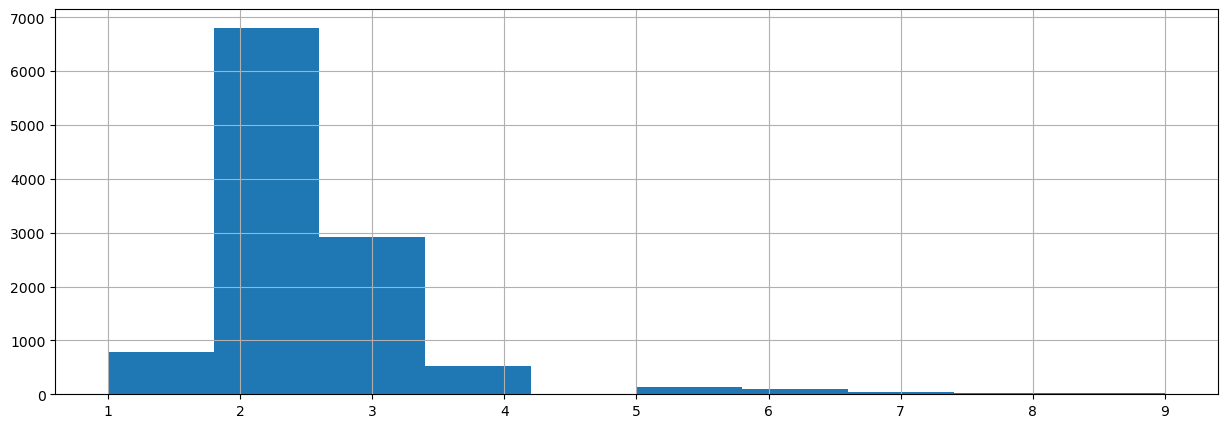

In [132]:
df1['bathroom'].hist()

<AxesSubplot:>

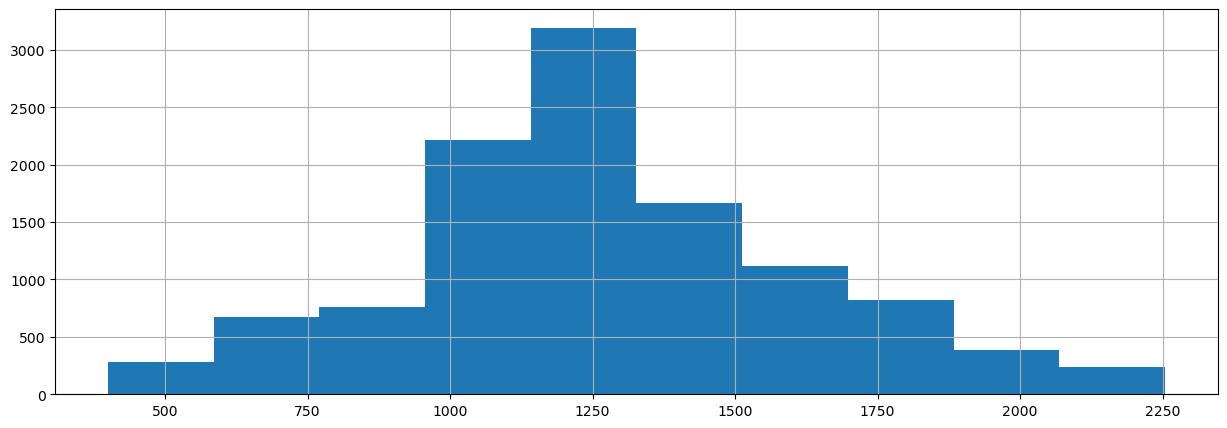

In [133]:
df1['total_sqft'].hist()

<AxesSubplot:>

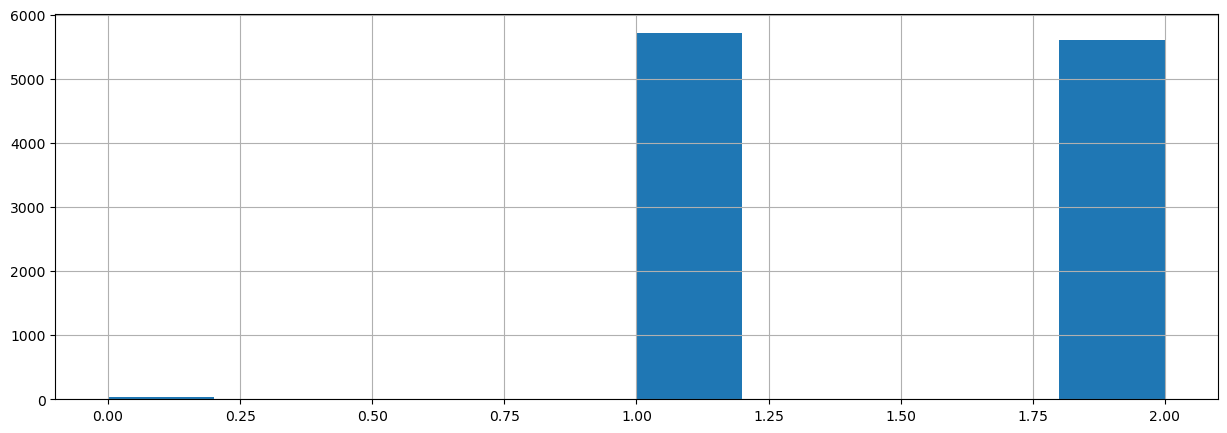

In [134]:
df1['parking'].hist()

<AxesSubplot:>

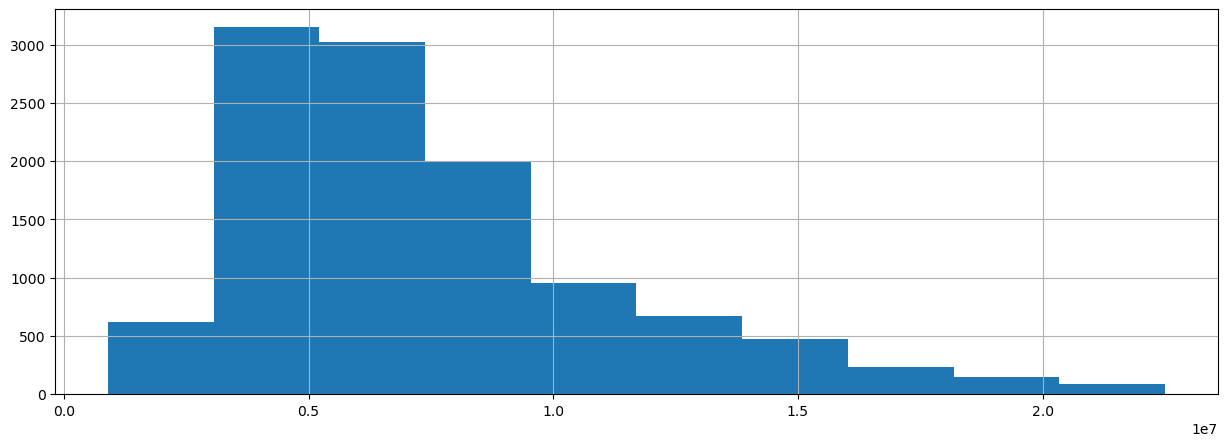

In [135]:
df1['price'].hist()

Checking for normality

That our target variable is normally distributed or not

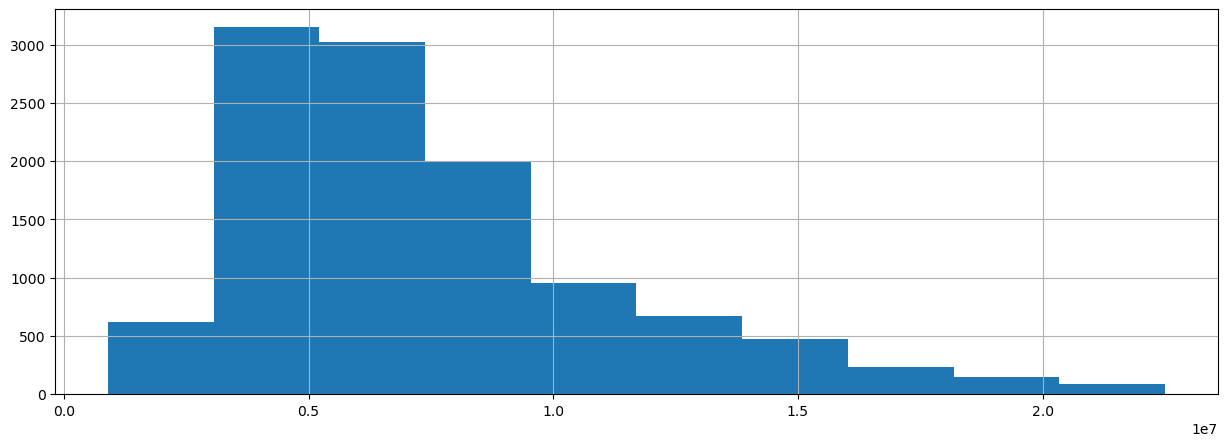

<Figure size 1500x800 with 0 Axes>

In [136]:
df1.price.hist()
plt.figure(figsize=(15,8))
plt.show()

In [137]:
#checking correlation between variables
df1.corr()

,bathroom,parking,balcony,price,total_sqft,resale,security24x7,clubhouse
bathroom,1.000000,0.024355,0.234642,0.558896,0.393331,-0.000296,0.004737,-0.007514
parking,0.024355,1.000000,0.021391,0.001431,0.043620,0.000470,0.001815,-0.006339
balcony,0.234642,0.021391,1.000000,0.160644,0.326099,0.009350,0.008641,-0.004401
price,0.558896,0.001431,0.160644,1.000000,0.575274,-0.013431,0.001088,-0.002608
total_sqft,0.393331,0.043620,0.326099,0.575274,1.000000,-0.003368,-0.007059,-0.005598
resale,-0.000296,0.000470,0.009350,-0.013431,-0.003368,1.000000,-0.007320,0.004504
security24x7,0.004737,0.001815,0.008641,0.001088,-0.007059,-0.007320,1.000000,-0.003722
clubhouse,-0.007514,-0.006339,-0.004401,-0.002608,-0.005598,0.004504,-0.003722,1.000000


<AxesSubplot:>

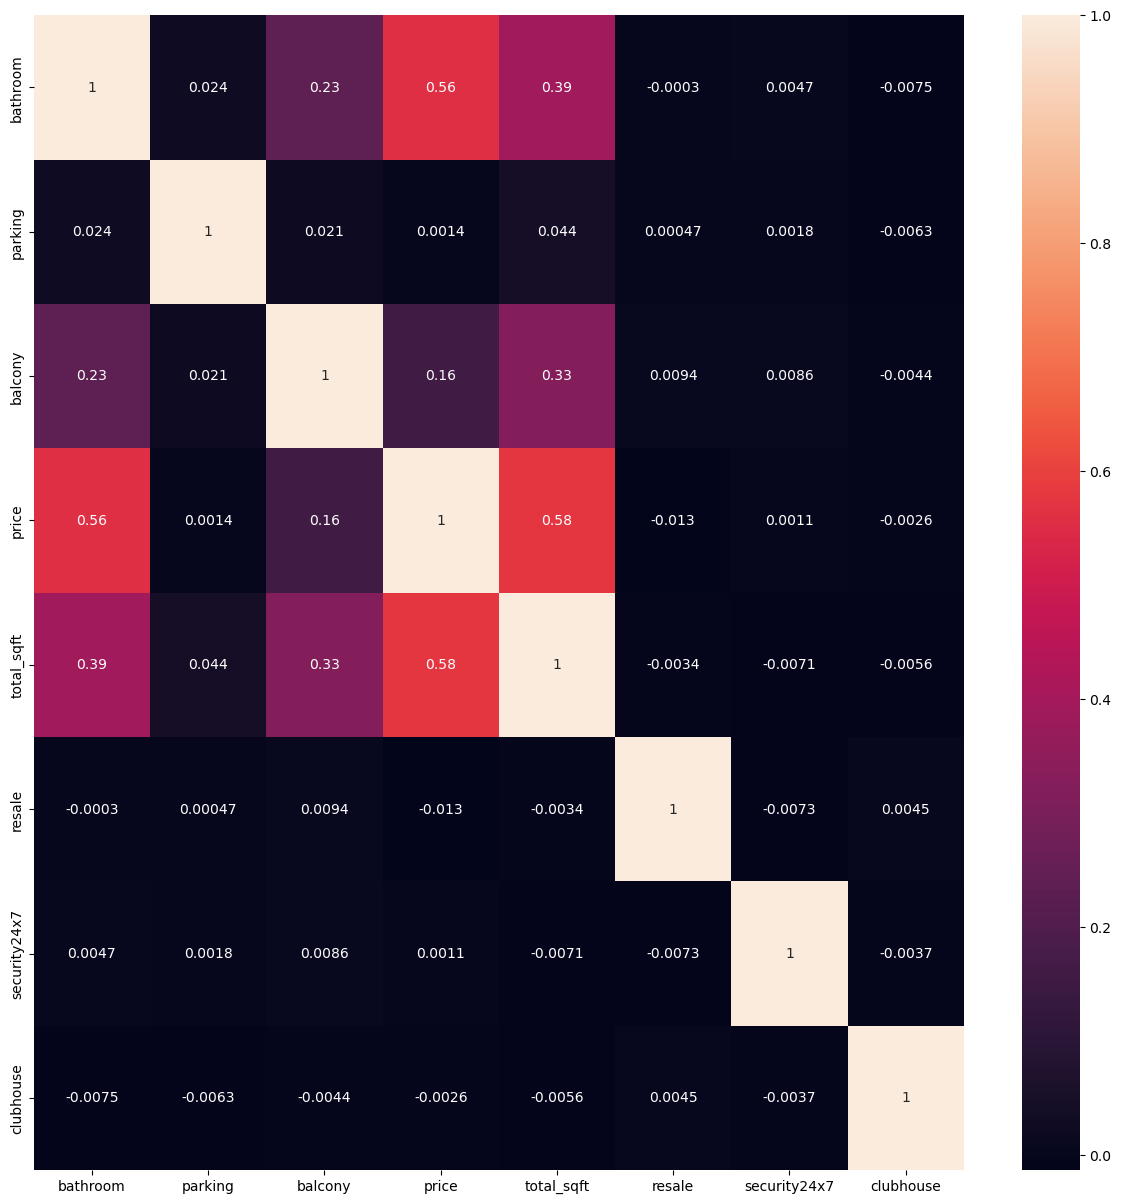

In [138]:
plt.figure(figsize = (15,15))
sns.heatmap(df1.corr(), annot=True)

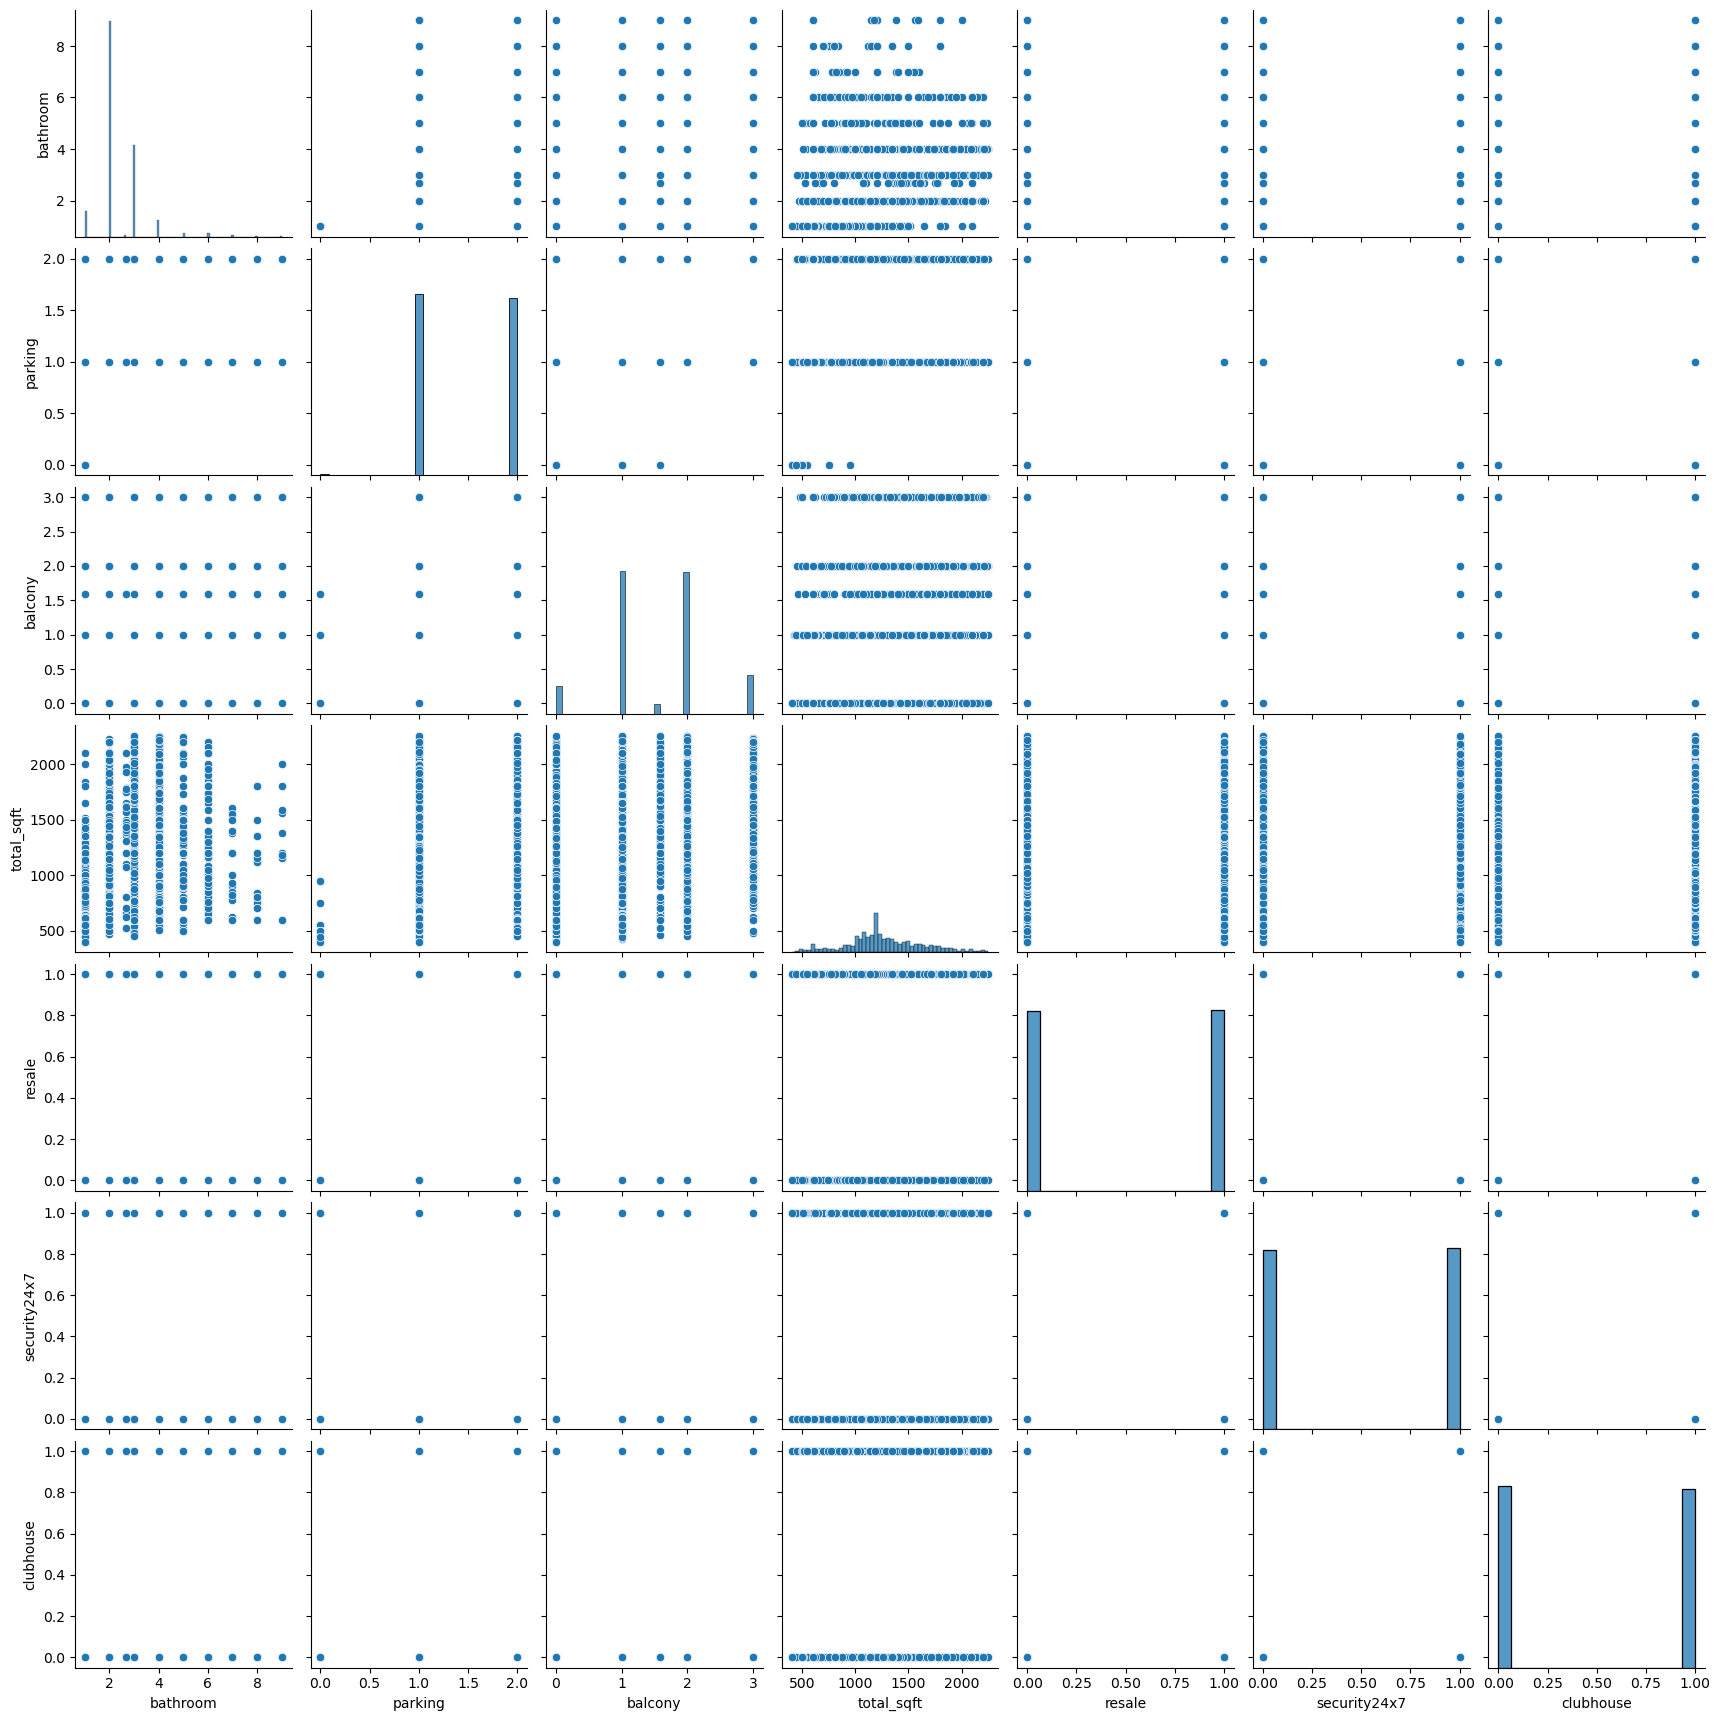

In [139]:
# pairplots to study relationships
sns.pairplot(X_num)

In [140]:
### scaling data

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
sc = MinMaxScaler()

In [144]:
#scaling the data using min max scaler
X_num_scaled = sc.fit_transform(X_num)
X_num_scaled = pd.DataFrame(X_num_scaled)
X_num_scaled.columns = X_num.columns

In [145]:
#checking scaled head
X_num_scaled.head()

,bathroom,parking,balcony,total_sqft,resale,security24x7,clubhouse
0,0.125,1.0,0.333333,0.353830,0.0,1.0,1.0
1,0.125,0.5,1.000000,0.560949,1.0,1.0,0.0
2,0.250,1.0,0.333333,0.604639,0.0,1.0,1.0
3,0.125,0.5,0.333333,0.431499,1.0,0.0,0.0
4,0.125,1.0,0.333333,0.415318,0.0,0.0,1.0


In [146]:
#checking shape of scaled numeric data 
X_num_scaled.shape

(11359, 7)

In [147]:
#One- Hot Encoding the categorical features
X_cat_encoded = pd.get_dummies(X_cat, columns = ['area_type','size','hospital_nearby','school_nearby','mall_nearby'])

In [148]:
#setting the index of both scaled categorical and numerical data
X_num_scaled.reset_index(inplace = True)
X_cat_encoded.reset_index(inplace = True)


In [149]:
#combining both the scaled data to make the final features data
X = pd.concat([X_num_scaled, X_cat_encoded],axis = 'columns')

In [150]:
#cheching shape of features
X.shape

(11359, 29)

In [151]:
#spliiting our feature and label data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3,random_state = 2)

In [152]:
#checking shape of train and test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7951, 29), (3408, 29), (7951, 1), (3408, 1))

# Linear regression

In [153]:
#multiple linear regression using OLS

In [181]:
#instantiating a linear regression model
lr = LinearRegression()

#fitting a linear regression model for our X and y
model_lr = lr.fit(X_train,y_train) 

In [182]:
#importing Mean Absolute Percentage as a model performance metric
from sklearn.metrics import mean_absolute_percentage_error as mape

In [183]:
 #predicting for our train data using lr model
preds_train_lr = model_lr.predict(X_train)

 #calculating mape for our train data
train_MAPE_lr = mape(y_train, preds_train_lr)

#printing train MAPE
print(train_MAPE_lr)

0.27071619192314167


In [184]:
#predicting for our test data using lr model
preds_test_lr = model_lr.predict(X_test) 

#calculating mape for our test data 
test_MAPE_lr = mape(y_test, preds_test_lr) 

#printing test MAPE
print(test_MAPE_lr)

0.28430591733909205


# R Square

In [171]:
r2_ols=model_lr.score(X_train,y_train)
r2_ols

0.5460610940543685

In [172]:
from sklearn.model_selection import GridSearchCV

In [173]:

from sklearn.metrics import mean_absolute_percentage_error


In [174]:
from sklearn.tree import DecisionTreeRegressor

# fit the Decission Tree Regressor model.

DT_model = DecisionTreeRegressor()
DT_model_fit = DT_model.fit(X_train , y_train)

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [175]:
from sklearn.metrics import r2_score


In [176]:
parameters={"max_depth" : [1,3,5,7,9,10],"min_samples_leaf":[2,3,4,5,6,7,8,9,10]}

tuning_model = GridSearchCV(DT_model,param_grid=parameters,scoring='r2',cv=10)

tuning_model.fit(X_train,y_train)
DT = tuning_model.best_estimator_

R2_dt_train = tuning_model.score(X_train,y_train)
print(R2_dt_train)

DT_pred = DT.predict(X_test)

mse_DT = mean_squared_error (y_test, DT_pred)
rmse_DT = np.sqrt(mean_squared_error (y_test, DT_pred))
r2_DT = r2_score(y_test, DT_pred)

print('MSE for DT model = ', mse_DT)
print('RMSE for DT model = ', rmse_DT)
print('R2 for DT model`= ', r2_DT)

print("Best parameters:", tuning_model.best_params_)

0.619526232547751
MSE for DT model =  7198037968325.633
RMSE for DT model =  2682915.9450727548
R2 for DT model`=  0.5461227893947771
Best parameters: {'max_depth': 7, 'min_samples_leaf': 9}


In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# Create a KNN regressor object
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the value of 'n_neighbors' as needed

# Train the KNN regressor
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 18879121325918.426


In [180]:

# Create a KNN regressor object
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the value of 'n_neighbors' as needed

# Train the KNN regressor
knn.fit(X_train,y_train)

# Predict on the training and testing sets
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Calculate MAPE for training set
mape_train = (abs(y_train - y_train_pred) / y_train).mean() * 100
print('MAPE (Training set): {:.2f}%'.format(mape_train.item()))

# Calculate MAPE for testing set
mape_test = (abs(y_test - y_test_pred) / y_test).mean() * 100
print('MAPE (Testing set): {:.2f}%'.format(mape_test.item()))


MAPE (Training set): 44.08%
MAPE (Testing set): 54.80%
